<a href="https://colab.research.google.com/github/fiza-azam/Machine-Learning-Projects/blob/main/Project_Age_and_Height_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
raw_data = pd.read_pickle('/content/drive/MyDrive/AgesAndHeights.pkl')
raw_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44a98dc0d0>,
      dtype=object)

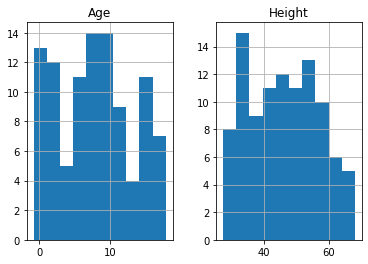

In [ ]:
raw_data.hist()
# Y axis refers to frequency in both charts

In [ ]:
# Removing the records with age equal to zero
clean_data = raw_data[raw_data['Age'] > 0]
clean_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


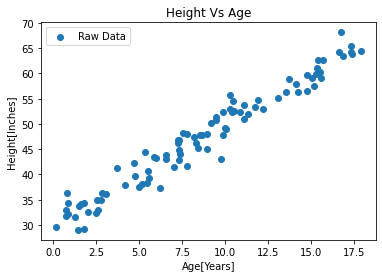

In [ ]:
#Plotting clean data
import matplotlib.pyplot as plt
ages = clean_data['Age']
heights = clean_data['Height']
plt.scatter(ages, heights, label='Raw Data')
plt.title("Height Vs Age")
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()

In [ ]:
#Hypothesis
parameters = {'y_intercept' : 40, 'slope':4 }
def y_hat(age, params):
  y_intercept = params['y_intercept']
  slope = params['slope']
  return y_intercept + slope * age

y_hat(5, parameters)

60

<h3>Linear Regression using Least Square Method</h3>

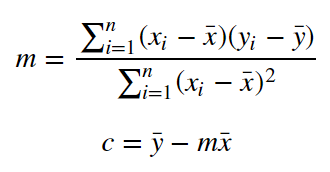

In [ ]:
def learn_parameters(data, params):
  x,y = data['Age'], data['Height']
  x_bar, y_bar = x.mean(), y.mean()
  x,y = x.to_numpy(), y.to_numpy()
  slope = sum((x-x_bar)*(y-y_bar))/sum((x-x_bar)**2)
  y_intercept = y_bar - (slope*x_bar)
  
  #update parameters
  params['y_intercept'] = y_intercept
  params['slope'] = slope

new_params = {'y_intercept':0, 'slope':0}
learn_parameters(clean_data, new_params)
new_params


{'slope': 2.0014168989106293, 'y_intercept': 29.96185761461584}

In [ ]:
#untrain Predictions using dummy data
demo_ages = list(range(19)) #dummy ages
untrained_predictions = [ y_hat(x,parameters) for x in demo_ages] #saving result of y_hat as a list for each age
print(untrained_predictions) #printing predicted values on params slope = 4,y_intercept = 40

[40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112]


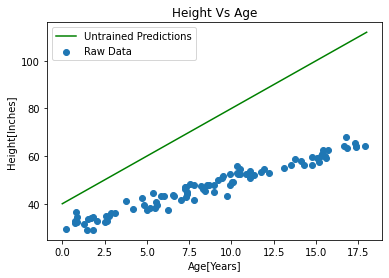

In [ ]:
#Plotting Untrained Predictions
ages = clean_data['Age']
height = clean_data['Height']
plt.scatter(ages, heights, label="Raw Data")
plt.plot(demo_ages, untrained_predictions, label="Untrained Predictions", color="green")
plt.title("Height Vs Age")
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()

[29.96185761461584, 31.96327451352647, 33.9646914124371, 35.96610831134773, 37.96752521025836, 39.96894210916899, 41.97035900807962, 43.971775906990246, 45.97319280590088, 47.974609704811506, 49.97602660372213, 51.97744350263277, 53.97886040154339, 55.98027730045402, 57.981694199364654, 59.98311109827528, 61.98452799718591, 63.98594489609654, 65.98736179500717]


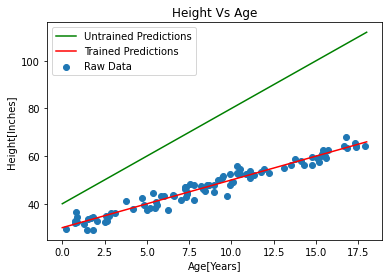

In [ ]:
trained_predictions = [ y_hat(x,new_params) for x in demo_ages] #traning model on optimized parameters slope and y_intercept
print(trained_predictions)

plt.scatter(ages, heights, label="Raw Data")
plt.plot(demo_ages, untrained_predictions, label="Untrained Predictions", color="green")
plt.plot(demo_ages, trained_predictions, label="Trained Predictions", color="red") #Plotting results of trained model
plt.title("Height Vs Age")
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()

<h2> Checking Goodness of Fit using R square Method </h2>
R square is a statistical measure of how close the data are to the fitted regression line

<img src=https://miro.medium.com/max/1200/1*_HbrAW-tMRBli6ASD5Bttw.png width = 50% height = 100>

In [ ]:
def R_square(data, params):
  x,y = data['Age'], data['Height']
  y_bar = y.mean()
  x,y = x.to_numpy(), y.to_numpy()
  y_pred = params['y_intercept'] + params['slope']*x
  ss_r = sum((y - y_pred)**2)
  ss_t = sum((y - y_bar)**2)
  r_square = 1 - (ss_r/ss_t)
  print(r_square)
R_square(clean_data, new_params)

0.954958596651655


In [ ]:
#Using built in library to check the result of above R_square Code
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = clean_data['Age'].values
Y = clean_data['Height'].values
X= X.reshape((93,1))
reg = LinearRegression()
reg = reg.fit(X,Y)
Y_pred = reg.predict(X)

r2Score = reg.score(X,Y)
print(r2Score)

0.954958596651655


In [ ]:
#Testing model on a new data
new_age = int(input("Enter age to predict height: "))
y_hat(new_age, new_params)

Enter age to predict height: 22


73.99302939064968

References <br>
[A Practical Tutorial to Simple Linear Regression Using Python](https://www.analyticsvidhya.com/blog/2021/03/a-practical-tutorial-to-simple-linear-regression-using-python/) <br>
[Linear Regression Algorithm | Linear Regression in Python | Machine Learning Algorithm | Edureka](https://www.youtube.com/watch?v=E5RjzSK0fvY)
